In [1]:
import os
import csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [2]:
def loadData(fileName, inputVariabName, outputVariabName):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1
    selectedVariable = dataNames.index(inputVariabName)
    inputs = [float(data[i][selectedVariable]) for i in range(len(data))]
    selectedOutput = dataNames.index(outputVariabName)
    outputs = [float(data[i][selectedOutput]) for i in range(len(data))]
    
    return inputs, outputs

crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'data', 'v1_world-happiness-report-2017.csv')

inputs, outputs = loadData(filePath, 'Family', 'Happiness.Score')
print('in:  ', inputs[:5])
print('out: ', outputs[:5])

in:   [1.510041952, 1.510041952, 1.510041952, 1.510041952, 1.510041952]
out:  [7.537000179, 7.521999836, 7.504000187, 7.493999958, 7.468999863]


In [3]:
def plotDataHistogram(x, variableName):
    n, bins, patches = plt.hist(x, 10)
    plt.title('Histogram of ' + variableName)
    plt.show()


def plotData(x1, y1, x2 = None, y2 = None, x3 = None, y3 = None, title = None):
    plt.plot(x1, y1, 'ro', label = 'train data')
    if (x2):
        plt.plot(x2, y2, 'b-', label = 'learnt model')
    if (x3):
        plt.plot(x3, y3, 'g^', label = 'test data')
    plt.title(title)
    plt.legend()
    plt.show()

In [4]:
# split data into training data (80%) and testing data (20%)
def splitData(inputs, outputs, train_size=0.8):
    np.random.seed(5)
    indexes = [i for i in range(len(inputs))]
    trainSample = np.random.choice(indexes, int(train_size * len(inputs)), replace=False)
    validationSample = [i for i in indexes if i not in trainSample]

    trainInputs = [inputs[i] for i in trainSample]
    trainOutputs = [outputs[i] for i in trainSample]

    validationInputs = [inputs[i] for i in validationSample]
    validationOutputs = [outputs[i] for i in validationSample]

    return trainInputs, trainOutputs, validationInputs, validationOutputs

In [5]:
# learning step: init and train a linear regression model y = f(x) = w0 + w1 * x

# using sklearn
def trainModel(trainInputs, trainOutputs, regressor):
    xx = [[el] for el in trainInputs]
    regressor.fit(xx, trainOutputs)
    w0, w1 = regressor.intercept_, regressor.coef_[0]
    return w0, w1

In [6]:
# plot the model
def plotModel(trainInputs, trainOutputs, w0, w1, title):
    noOfPoints = 1000
    xref = []
    val = min(trainInputs)
    step = (max(trainInputs) - min(trainInputs)) / noOfPoints
    for i in range(1, noOfPoints):
        xref.append(val)
        val += step
    yref = [w0 + w1 * el for el in xref] 
    plotData(trainInputs, trainOutputs, xref, yref, [], [], title=title)

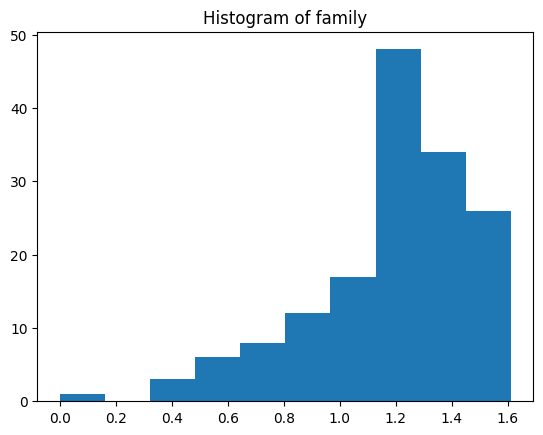

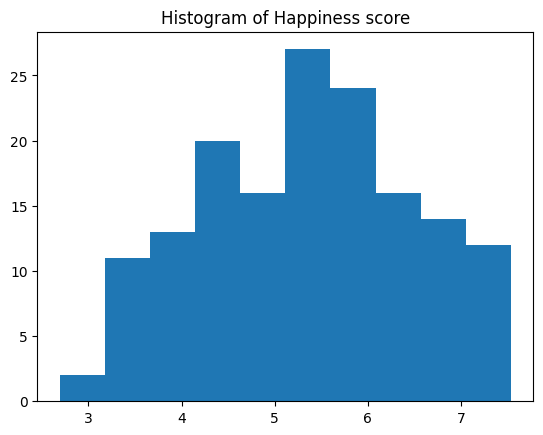

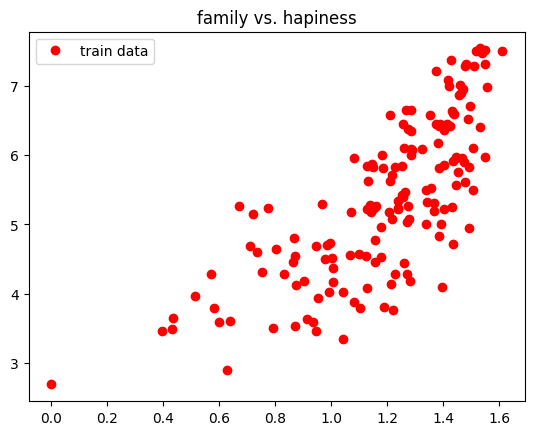

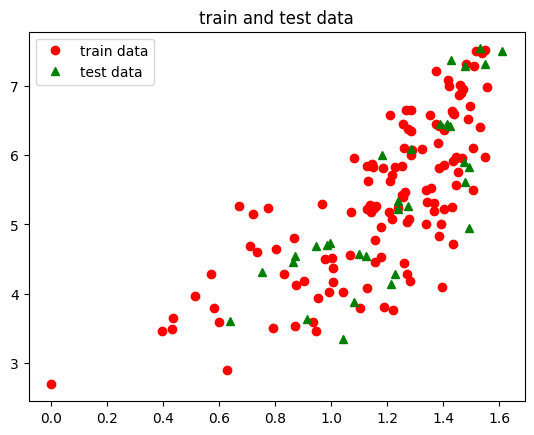

The learnt model: f(x) =  2.039013930022846  +  2.804913617557077  * x


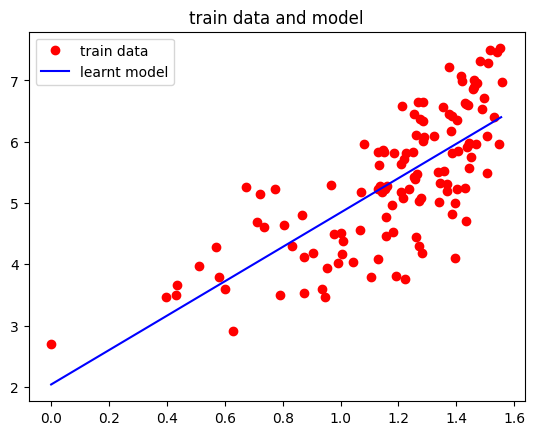

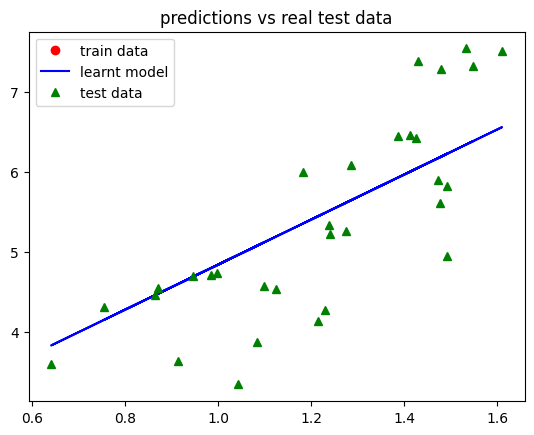

prediction error (tool):  0.6051231125473606


In [24]:
# put all steps togheter
# using sklearn 

crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'data', 'v3_world-happiness-report-2017.csv')
#filePath = os.path.join(crtDir, 'data', 'v2_world-happiness-report-2017.csv')
#filePath = os.path.join(crtDir, 'data', 'v3_world-happiness-report-2017.csv')

inputs, outputs = loadData(filePath, 'Family', 'Happiness.Score')

plotDataHistogram(inputs, 'family')
plotDataHistogram(outputs, 'Happiness score')

# check the liniarity
plotData(inputs, outputs, [], [], [], [], 'family vs. hapiness')

# split data into training data (80%) and testing data (20%)
trainInputs, trainOutputs, validationInputs, validationOutputs = splitData(inputs, outputs)
plotData(trainInputs, trainOutputs, [], [], validationInputs, validationOutputs, "train and test data")

# learning step: init and train a linear regression model y = f(x) = w0 + w1 * x
regressor = linear_model.LinearRegression()  # model initialisation
w0, w1 = trainModel(trainInputs, trainOutputs, regressor)
print('The learnt model: f(x) = ', w0, ' + ', w1, ' * x')

# plot the model
plotModel(trainInputs, trainOutputs, w0, w1, "train data and model")

# makes predictions for test data (by tool)
computedValidationOutputs = regressor.predict([[x] for x in validationInputs])
plotData([], [], validationInputs, computedValidationOutputs, validationInputs, validationOutputs, "predictions vs real test data")

# compute the differences between the predictions and real outputs
error = mean_squared_error(validationOutputs, computedValidationOutputs)
print("prediction error (tool): ", error)

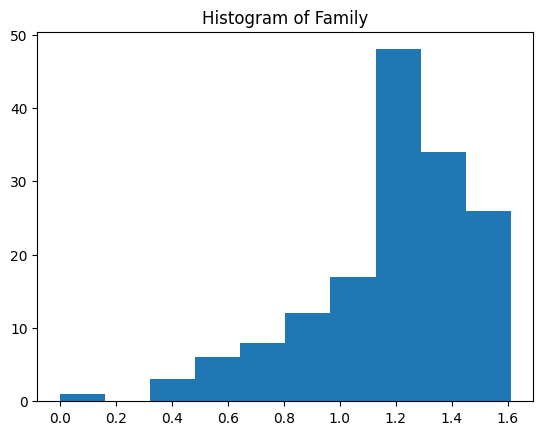

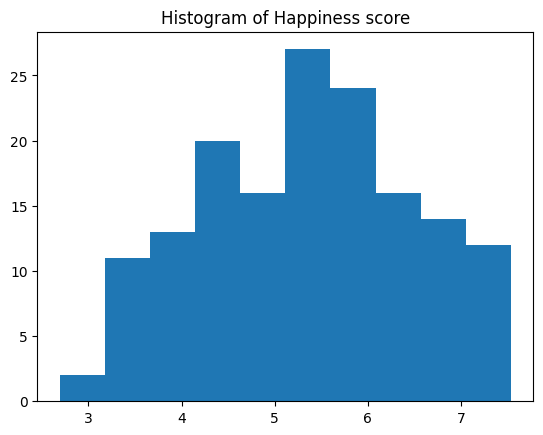

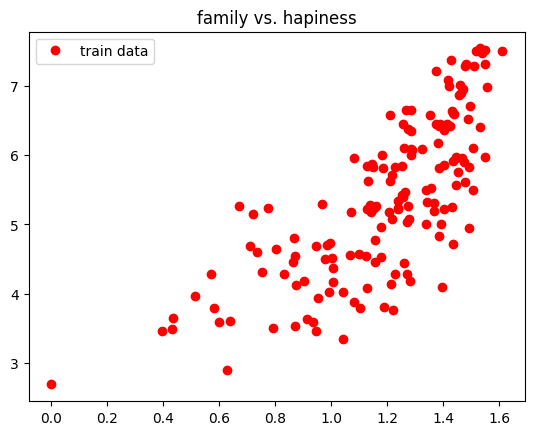

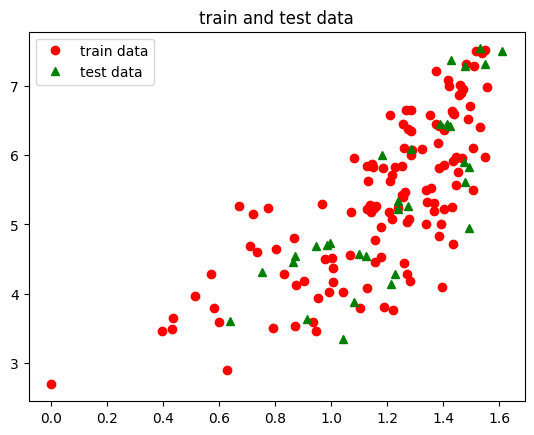

The learnt model: f(x) =  2.039013930022846  +  2.804913617557077  * x


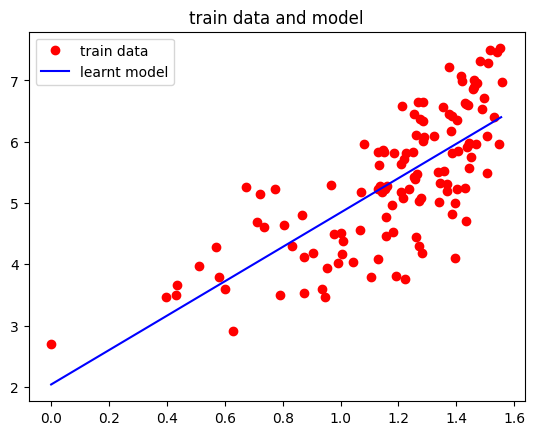

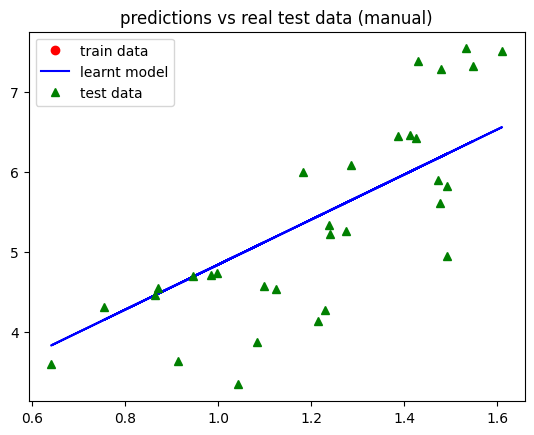

Prediction error (manual):  0.6051231125473586


In [25]:
class MyLinearRegression:
    def __init__(self):
        self.intercept_ = 0.0
        self.coef_ = 0.0

    def fit(self, x, y):
        sx = sum(x)
        sy = sum(y)
        sx2 = sum(i * i for i in x)
        sxy = sum(i * j for (i,j) in zip(x, y))
        w1 = (len(x) * sxy - sx * sy) / (len(x) * sx2 - sx * sx)
        w0 = (sy - w1 * sx) / len(x)
        self.intercept_, self.coef_ =  w0, w1

    # predict the outputs for some new inputs (by using the learnt model)
    def predict(self, x):
        #if isinstance(x[0], list):
        #    return [self.intercept_ + self.coef_ * val[0] for val in x]
        #else:
        return [self.intercept_ + self.coef_ * val for val in x]

    def evaluate(self, validationOutputs, computedValidationOutputs):
        error = sum([(t1 - t2) ** 2 for t1, t2 in zip(computedValidationOutputs, validationOutputs)]) / len(validationOutputs)
        return error


# Instantiate MyLinearRegression class
model = MyLinearRegression()

crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'data', 'v2_world-happiness-report-2017.csv')
#filePath = os.path.join(crtDir, 'data', 'v2_world-happiness-report-2017.csv')
#filePath = os.path.join(crtDir, 'data', 'v3_world-happiness-report-2017.csv')

inputs, outputs = loadData(filePath, 'Family', 'Happiness.Score')

plotDataHistogram(inputs, 'Family')
plotDataHistogram(outputs, 'Happiness score')

# check the liniarity
plotData(inputs, outputs, [], [], [], [], 'family vs. hapiness')

# split data into training data (80%) and testing data (20%)
trainInputs, trainOutputs, validationInputs, validationOutputs = splitData(inputs, outputs)
plotData(trainInputs, trainOutputs, [], [], validationInputs, validationOutputs, "train and test data")

# learning step: init and train a linear regression model y = f(x) = w0 + w1 * x
model.fit(trainInputs, trainOutputs)
print('The learnt model: f(x) = ', w0, ' + ', w1, ' * x')

# plot the model
plotModel(trainInputs, trainOutputs, w0, w1, "train data and model")

# makes predictions for test data (manual)
computedValidationOutputs = model.predict(validationInputs)
plotData([], [], validationInputs, computedValidationOutputs, validationInputs, validationOutputs, "predictions vs real test data (manual)")

# compute the differences between the predictions and real outputs
error = model.evaluate(validationOutputs, computedValidationOutputs)
print("Prediction error (manual): ", error)